# **Funções de ativação**

_Este Notebook acessará conteúdos abordados no **e-book** [TAIL — Introdução à Matemática para Inteligência Artificial](https://www.overleaf.com/read/gtspgphgvstz), seja livre para revisitá-lo quando necessário._

### Introdução

Em uma Rede Neural, cada neurônio é caracterizado pelo seu peso, bias e a função de ativação. Os neurônios realizam uma transformação linear na entrada pelos pesos e bias e a transformação não linear é feita pela função de ativação. A informação flui da camada de entrada para as camadas seguintes, realizando o processamento dos dados e enviam a saída final para a camada de saída. Mas e se o resultado gerado estiver longe do valor esperado? Em uma rede neural, os pesos e bias dos neurônios são atualizados com base no erro. Uma vez que todos os dados passaram por este processo, os pesos e bias finais são utilizados para previsões.

Percebemos esse processo na imagem abaixo:



<p align="center">
  <img width="480" height="280" src="https://i.imgur.com/9glCfmj.png">
</p>



### Importando as bibliotecas necessárias


In [ ]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from keras.utils import to_categorical
from keras.layers import LeakyReLU

### Funções

#### Função Sigmoid
_(e-book: 4.6 Exemplos, p. 23)_

A função Sigmoid permite converter um input em um range binário (0 e 1), o que é uma característica desejável, por exemplo, em problemas de classificação. Ela se caracteriza como uma função com não linearidade. 

A função é definida como:

$$
σ(x) = 
{1 
\over 
{1 + {e^{-x}}}}
$$




<p align="center">
  <img width="400" height="280" src="https://i1.wp.com/clay-atlas.com/wp-content/uploads/2019/10/sigmoid.png?w=640&ssl=1%22%3E">
</p>


In [ ]:
#Utilizando SciPy
def expit(x):
  return scipy.special.expit(x)

#Utilizando Numpy
def sigmoid(X):
  return 1/(1+np.exp(-X))

#### Função Softmax
_(e-book: 4.6 Exemplos, p. 24)_

A Função Softmax é uma generalização da função Sigmoide para casos não-binários. Geralmente, ela não é aplicada às camadas intermediárias da Rede Neural, mas na camada de saída de problemas de classificação multiclasse, pois a mesma é capaz de produzir valores no intervalo [0, 1] em que sua soma é igual a 1. Ou seja, em um problema com 3 classes, por exemplo, a função Softmax produzirá 3 valores, que somam 1, em que cada valor representa a probabilidade da instância pertencer a uma das 3 possíveis classes.

A função é definida como:

$$
f_{i}(\vec{x}) = 
{e^{x_{i}}
\over
{{\sum_{j=1}^{J}}e^{x_{j}}}
}\ \
 \text {para}\ i \text{ = 1, ..., J}
$$


In [ ]:
#Utilizando Numpy
def softmax(x):
   return np.exp(x) / np.sum(np.exp(x))

#### TanH

A Função TanH funciona de forma semelhante à função sigmóide, pórem simetricamente em relação à origem, variando entre o intervalo [-1,1]. Ela é contínua, diferenciável em todos os pontos e não linear. 

A função é definida como:

$$
f(x) =
tanh(x) = 
{({e^x} - {e^{-x}}) 
\over 
({{e^x} + {e^{-x}})}}
$$


<p align="center">
  <img width="400" height="280" src="https://i0.wp.com/clay-atlas.com/wp-content/uploads/2019/10/image-44.png?w=640&ssl=1%22%3E">
</p>



In [ ]:
#Utilizando Numpy
def tanh(x):
  return np.tanh(x)

#### ReLU 

A principal vantagem de utilizar a função Rectified Linear Unit (Relu) em relação à outras funções de ativação é que a mesma não ativa todos os neurônios da rede ao mesmo tempo. Se a função ReLU receber um input e ele for um valor negativo, o output será zero e o neurônio não será ativado, caso contrário se conserva o valor de entrada. Isso significa que, ao mesmo tempo, apenas alguns neurônios são ativados, tornando a rede esparsa, eficiente e fácil para a computação.

A função é definida como:

$$
f(x) = \left\{
  \begin{array}\\
    {0} & \mbox{para} \ x \leq 0\\
    {x} & \mbox{para} \ x > \ 0\\
  \end{array}
  \right.
 = max\{0, x\}
$$

<p align="center">
  <img width="400" height="280" src="https://i2.wp.com/clay-atlas.com/wp-content/uploads/2019/10/ReLU.png?w=640&ssl=1%22%3E">
</p>


In [ ]:
#Utilizando Numpy
def relu(X):
  return np.maximum(0,X)

#Outra Implementação 
def relu2(x):
  return 0 if x < 0.0 else x

#### Leaky ReLU

A função Leaky ReLU é uma versão melhorada da função ReLU. Na função ReLU, o output é 0 para um input x < 0, que implica na "morte" dos neurônios por ativações nessa região. A Leaky ReLU ameniza este problema, ao invés de definir a função Relu como 0 para x inferior a 0, ela é definida como um pequeno componente linear de x. Substituindo a linha horizontal por uma linha não-zero ou não horizontal. 

A função é definida como:

$$
f(x) = \left\{
    \begin{array}\\
        0.01x & \mbox{para } \ x  < \ 0 \\
        x & \mbox{para } \ x \geq  0 \\
    \end{array}
\right.
$$


<p align="center">
  <img width="400" height="280" src="https://i1.wp.com/clay-atlas.com/wp-content/uploads/2019/10/image-37.png?resize=640%2C480&ssl=1%22%3E">
</p>

In [ ]:
#Utilizando Numpy
def leakyrelu(x):
   return np.maximum(0.1*x,x)

#Outra Implementação   
def leakyrelu2(x):
  return x*0.01 if x < 0 else x

#### Singularidade
_(e-book: 4.7.1 Exercício (1): Regressão Logística, p. 24)_

A função logística é uma função composta pela função Sigmoid aplicada numa reta de uma regressão.

Seja 

$$f(x) = ax+b$$

e

$$
g(x) = 
{1 
\over 
{1 + {e^{-x}}}}
$$

A expressão g(f(x)) será caracterizada como a regressão logística. Sabendo que a equação da regressão linear múltipla é dada por 

$$Y = \beta \ \cdot \ X$$

podemos estabelecer uma interpretação da função logística utilizando a função Sigmoid e um hiperplano. Em resumo, se temos a Regressão Linear Múltipla e a Sigmoid, a composta de ambas será a função logística. 

### Exemplo Prático

Problema de Classificação com o MNIST.

#### Carregando o Banco de Dados

O MNIST consiste de 70.000 imagens 28x28 de 10 dígitos escritos à mão. Foram utilizadas 60.000 imagens para treinamento e 10.000 imagens para teste.


In [ ]:
#O mnist.load_data() já realiza o split das imagens de teste e treinamento do MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### Analisando os Dados

In [ ]:
#Analisando o formato dos dados do banco
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


O digito é 9


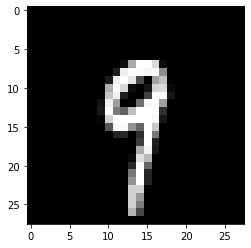

In [ ]:
#Analisando uma instância do banco de dados
plt.imshow(x_train[600], cmap = "gray") 
print("O dígito é " + str(y_train[600]))

#### Criando as classes

In [ ]:
#Categoriza as instâncias do banco de dados em dez classes
y_train_oh = to_categorical(y_train, 10)
y_test_oh = to_categorical(y_test, 10)

### Criando o Modelo

Construir a rede neural requer configurar as camadas do modelo, e depois, compilar o modelo. O principal bloco de construção da rede neural é a camada (layer). As camadas (layers) extraem representações dos dados inseridos na rede. 








### Primeira camada

A primeira camada da rede, Flatten, transforma o formato da imagem de um array de imagens de duas dimensões (28x28) para um array de uma dimensão (de 28 * 28 = 784 pixels). Podemos interpretar como um enfileramento dos pixels da imagem.  Essa camada não tem paramêtros para aprender, ela só reformata os dados.

In [ ]:
#Cria um modelo sequencial
modelo = Sequential()
#Inseri uma camada Flatten 
modelo.add(Flatten(input_shape = (28,28)))

### Camadas seguintes
Depois dos pixels serem achatados, a rede consite de uma sequência de duas camadas Dense. Essa são camadas neurais densely connected, ou fully connected. A primeira camada Dense tem 128 nós (ou neurônios). A segunda (e última) camda é uma softmax de 10 nós que retorna um array de 10 probabilidades, cuja soma resulta em 1. Cada nó contem um valor que indica a probabilidade de que aquela imagem pertence a uma das 10 classes.

In [ ]:
#Inseri uma camada densa utilizando a função relu como a função de ativação
modelo.add(Dense(256, activation="relu")) 
#Inseri uma camada densa utilizando a função relu como a função de ativação
modelo.add(Dense(128, activation="relu"))
#Inseri uma camada densa utilizando a função softmax como a função de ativação
modelo.add(Dense(10, activation="softmax"))

#Exibe detalhes sobra o modelo criado
modelo.summary() 

### Compilar o modelo
Em seguida, é realizado a compilação do modelo informando os seguintes dados:

Optimizer — Isso é como o modelo se atualiza com base no dado que ele vê e sua função loss.

Função Loss — Essa mede quão precisa o modelo é durante o treinamento. Queremos minimizar a função para guiar o modelo para direção certa.

Métricas — usadas para monitorar os passos de treinamento e teste. O exemplo abaixo usa a acurácia, a fração das imagens que foram classificadas corretamente.

In [ ]:
#Compila o modelo criado
modelo.compile(optimizer= "adam", loss = 'categorical_crossentropy', metrics=['accuracy'])

###Treinamento

Em seguida, é realizado o treinamento do modelo, alimentando ele com os dados de treinamento, o modelo. Neste exemplo, os dados de treinamento são os arrays x_train e y_train_oh. O modelo aprende como associar as imagens as labels.


In [ ]:
#Treina o modelo criado passando os dados de predição e os outputs esperados 
modelo.fit(x_train/255, y_train_oh, batch_size= 32, epochs= 1)

#### Avaliando o Modelo

O passo seguinte é colocar o modelo para fazer previsões sobre o conjunto de teste — nesse exemplo, o array x_test. Verificamos se as previsões combinaram com as labels do array y_train_oh.

In [ ]:
modelo.evaluate(x_test/255, y_test_oh)

313/313 [==============================] - 0s 1ms/step - loss: 0.1111 - accuracy: 0.9643


[0.11109666526317596, 0.9642999768257141]